In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#from google.colab import files
import seaborn as sns
from sklearn.linear_model import LinearRegression
from turtle import color
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [5]:
# Cargar el archivo CSV y obtener su contenido
import pandas as pd

# Load the Excel file into a DataFrame
credicel = pd.read_excel('df_limpio.xlsx')

# Get information about the DataFrame
credicel.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22735 entries, 0 to 22734
Data columns (total 39 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   folio               22735 non-null  int64         
 1   tag                 22735 non-null  object        
 2   folio_solicitud     22735 non-null  int64         
 3   fecha               22735 non-null  datetime64[ns]
 4   marca               22735 non-null  object        
 5   modelo              22735 non-null  object        
 6   plazo               22735 non-null  object        
 7   precio              22735 non-null  float64       
 8   enganche            22735 non-null  float64       
 9   descuento           22735 non-null  float64       
 10  semana              22735 non-null  int64         
 11  monto_financiado    22735 non-null  float64       
 12  costo_total         22735 non-null  int64         
 13  monto_accesorios    22735 non-null  float64   

In [6]:
valores_nulos=credicel.isnull().sum()
valores_nulos

folio                     0
tag                       0
folio_solicitud           0
fecha                     0
marca                     0
modelo                    0
plazo                     0
precio                    0
enganche                  0
descuento                 0
semana                    0
monto_financiado          0
costo_total               0
monto_accesorios          0
agente_venta              0
dis_venta                 0
status                    0
fraude                    0
empresa                  13
inversion                 0
pagos_realizados          0
reautorizacion            0
fecha_ultimo_pago      3356
fecha_pago_proximo     3356
status_cuenta          3314
puntos                    0
riesgo                    0
score_buro                0
razones_buro           7340
porc_eng                  0
limite_credito            0
semana_actual             0
cp_cliente             7243
edad_cliente          13108
cd_cliente                0
edo_cliente         

In [7]:
#Cuarto método de sustitución de valores nulos
#Sustituir valores nulos por un string en  concreto
credicel["empresa"] =credicel["empresa"].fillna("Sin Especificar")

In [8]:
valores_nulos=credicel.isnull().sum()
valores_nulos

folio                     0
tag                       0
folio_solicitud           0
fecha                     0
marca                     0
modelo                    0
plazo                     0
precio                    0
enganche                  0
descuento                 0
semana                    0
monto_financiado          0
costo_total               0
monto_accesorios          0
agente_venta              0
dis_venta                 0
status                    0
fraude                    0
empresa                   0
inversion                 0
pagos_realizados          0
reautorizacion            0
fecha_ultimo_pago      3356
fecha_pago_proximo     3356
status_cuenta          3314
puntos                    0
riesgo                    0
score_buro                0
razones_buro           7340
porc_eng                  0
limite_credito            0
semana_actual             0
cp_cliente             7243
edad_cliente          13108
cd_cliente                0
edo_cliente         

In [9]:
#Cuarto método de sustitución de valores nulos
#Sustituir valores nulos por un string en  concreto
credicel["fecha_ultimo_pago"] =credicel["fecha_ultimo_pago"].fillna("2030-06-19 00:00:00")
credicel["fecha_pago_proximo"] = credicel["fecha_pago_proximo"].fillna("2030-06-19 00:00:00")
credicel["status_cuenta"] = credicel["status_cuenta"].fillna("Sin Especificar")
credicel["razones_buro"] = credicel["razones_buro"].fillna("N/A")

credicel["cp_cliente"] =credicel["cp_cliente"].fillna(method="bfill")

credicel["edad_cliente"]=credicel["edad_cliente"].fillna(round(credicel["edad_cliente"].mean(),1))

In [10]:
valores_nulos=credicel.isnull().sum()
valores_nulos

folio                 0
tag                   0
folio_solicitud       0
fecha                 0
marca                 0
modelo                0
plazo                 0
precio                0
enganche              0
descuento             0
semana                0
monto_financiado      0
costo_total           0
monto_accesorios      0
agente_venta          0
dis_venta             0
status                0
fraude                0
empresa               0
inversion             0
pagos_realizados      0
reautorizacion        0
fecha_ultimo_pago     0
fecha_pago_proximo    0
status_cuenta         0
puntos                0
riesgo                0
score_buro            0
razones_buro          0
porc_eng              0
limite_credito        0
semana_actual         0
cp_cliente            0
edad_cliente          0
cd_cliente            0
edo_cliente           0
cd_venta              0
edo_venta             0
curp                  0
dtype: int64

# Análisis de Regresión: Precio

In [11]:
#Declaramos las variables dependientes e independientes para la regresión linea
x_precio=credicel[['descuento', 'semana','monto_accesorios','status','fraude','inversion','reautorizacion','puntos','score_buro','limite_credito','semana_actual','edad_cliente']]
y_precio=credicel['precio']

In [12]:
#Dividimos los datos por training y tests
x_train, x_test, y_train, y_test = train_test_split(x_precio, y_precio, test_size=0.2, random_state=42)

In [13]:
# Creamos el modelo de regresión
model = LinearRegression()

model.fit(x_train, y_train)

LinearRegression()

In [14]:
# Calculamos los coeficientes por cada una de las variables
coeficientes = model.coef_

# Intercepto
intercepto = model.intercept_

# Imprimimos los coeficientes y el intercepto
print("Coeficientes:", coeficientes)
print("Intercepto:", intercepto)


Coeficientes: [ 3.64504747e-01  9.68171138e+00 -4.62758835e-02 -5.44700189e+02
 -2.34378752e+01 -7.54540694e+01  7.81022537e+01  5.35371352e+00
  2.42661643e-01 -2.90978264e-02  1.32428405e+01 -3.38919212e+00]
Intercepto: 2239.529925863191


Variables con un mayor coeficiente:

1.   Reautorización: 78.10
2.   Status: -544.70



In [15]:
# Hacemos predicciones
y_pred = model.predict(x_test)

# Calculate the R-squared score
r2 = r2_score(y_test, y_pred)
print("R-squared (R2) score:", r2)


R-squared (R2) score: 0.5257542087094372


In [16]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['descuento', 'semana', 'monto_accesorios', 'status', 'fraude',
        'inversion', 'reautorizacion', 'puntos', 'score_buro',
        'limite_credito', 'semana_actual', 'edad_cliente'], dtype=object),
 'n_features_in_': 12,
 'coef_': array([ 3.64504747e-01,  9.68171138e+00, -4.62758835e-02, -5.44700189e+02,
        -2.34378752e+01, -7.54540694e+01,  7.81022537e+01,  5.35371352e+00,
         2.42661643e-01, -2.90978264e-02,  1.32428405e+01, -3.38919212e+00]),
 'rank_': 12,
 'singular_': array([2.87962228e+05, 3.79424243e+04, 1.78137513e+04, 1.34434657e+04,
        7.94214588e+03, 1.66028926e+03, 1.27047198e+03, 1.08046016e+03,
        5.92473691e+01, 5.35276554e+01, 3.40487059e+01, 2.17206426e+01]),
 'intercept_': 2239.529925863191}

# Modelo:

precio = 2239.53 + (0.3645×descuento) + (9.6817×semana) + (−0.0463×monto_accesorios) + (−544.70×status) + (−23.44×fraude) + (−75.45×inversion) + (78.10×reautorizacion) + (5.35×puntos) + (−23.44×fraude) + (−75.45×inversion) + (78.10×reautorizacion) + (5.35×puntos) + (0.2427×score_buro) + (−0.0291×limite_credito) + (13.24×semana_actual) + (−3.39×edad_cliente) + (0.2427×score_buro) + (−0.0291×limite_credito) + (13.24×semana_actual) + (−3.39×edad_cliente)

In [17]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(x_precio,y_precio)

0.5052229903699365

In [18]:
#Predecimos los valores del precio a partir del valor del enganche
y_pred_1= model.predict(X=x_precio)
y_pred_1

array([2055.22147274, 3122.73304979, 3034.71734905, ..., 4083.73372058,
       5351.18602529, 4318.56525959])

In [19]:
#Realizamos una copia del dataframe
credicel2=credicel.copy()

In [20]:
#Insertamos la columna de predicciones en el DataFrame
credicel2.insert(0, 'Predicciones', y_pred_1)
credicel2

,Predicciones,folio,tag,folio_solicitud,fecha,marca,modelo,plazo,precio,enganche,...,porc_eng,limite_credito,semana_actual,cp_cliente,edad_cliente,cd_cliente,edo_cliente,cd_venta,edo_venta,curp
0,2055.221473,3,HDNAWQ3A,30,2021-11-12 19:00:00,ZTE,Blade A3 2020 RO B,26S,1949.0,780.0,...,40.02,5000,26,72490,23.0,0,0,Tantoyuca,Veracruz,AEVM980413MVZNDR02
1,3122.733050,4,M418YNR4,33,2021-11-12 19:15:00,MOTOROLA,LTE XT2097-12 E7I POWER Azul,13S,2999.0,1050.0,...,35.01,6000,13,72490,60.0,PUEBLA,PUE.,Heroica Puebla de Zaragoza,Puebla,ZALC610119MPLPRR07
2,3034.717349,5,SZ7V3NZT,37,2021-11-13 14:13:00,ZTE,BLADE A3 2020 Gris,13S,1959.0,490.0,...,25.01,0,74,72490,58.0,TANTOYUCA,VER.,0,0,0
3,2622.146556,6,9I08UIQZ,38,2021-11-13 15:45:00,ZTE,BLADE A3 2020 Gris,13S,1959.0,490.0,...,25.01,7000,13,72490,42.0,AMXTLAN PUE,0,Zacatlan,Puebla,SAMJ790115MPLNRS02
4,4082.616436,7,JMF4LKYU,44,2021-11-13 16:10:00,MOTOROLA,G10 B,39S,4299.0,1075.0,...,25.01,7000,74,72490,33.0,TANTOYUCA,VER.,Tantoyuca,Veracruz,TEHF880707HVZRRR07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22730,3492.366023,22967,92KQVRIX,96502,2023-04-18 18:45:00,Motorola,Moto E13,26S,3349.0,297.0,...,8.87,10000,0,97880,35.9,0,YUC,Oxkutzcab,Yucatan,PACT990804MYNCCH05
22731,3534.010450,22968,NWB2EA8J,96479,2023-04-18 18:46:00,Motorola,Moto E22i,26S,4100.0,1209.0,...,29.49,5000,0,37295,35.9,0,GTO,Leon,Guanajuato,HEGB950620MGTRMN03
22732,4083.733721,22969,VDTRJ2W6,96442,2023-04-18 18:47:00,Samsung,A13,26S,4849.0,1152.0,...,23.76,4750,0,20210,35.9,0,AGS,Aguascalientes,Aguascalientes,GADF870205HASLZL07
22733,5351.186025,22970,PETLF56C,96536,2023-04-18 18:49:00,Samsung,A53 5G,39S,9799.0,2799.0,...,28.56,7000,0,78434,35.9,0,SLP,Soledad De Graciano Sanchez,San Luis Potosi,DELJ700417HSPLRS03


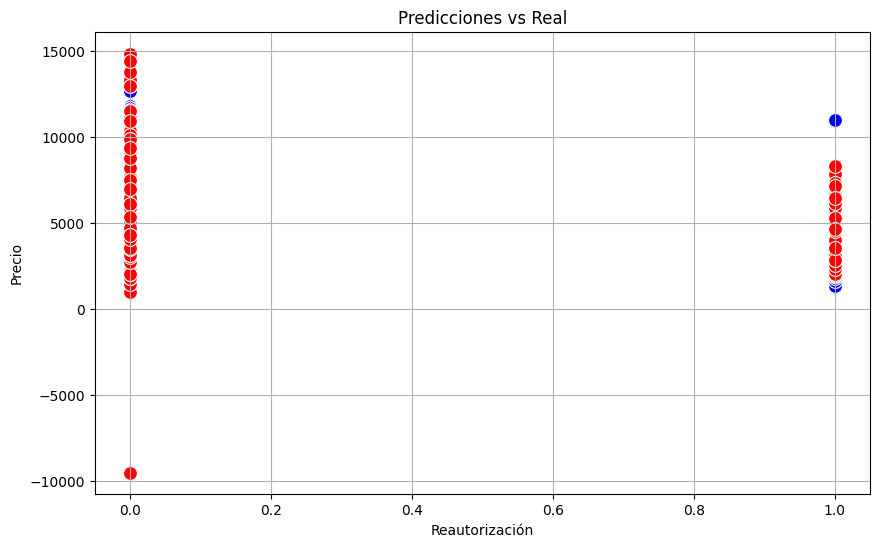

In [21]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido
plt.figure(figsize=(10, 6))
sns.scatterplot(data=credicel2, x='reautorizacion', y='precio', color='blue', s=100)
sns.scatterplot(data=credicel2, x='reautorizacion', y='Predicciones', color='red', s=100)
plt.title('Predicciones vs Real')
plt.xlabel('Reautorización')
plt.ylabel('Precio')
plt.grid(True)
plt.show()

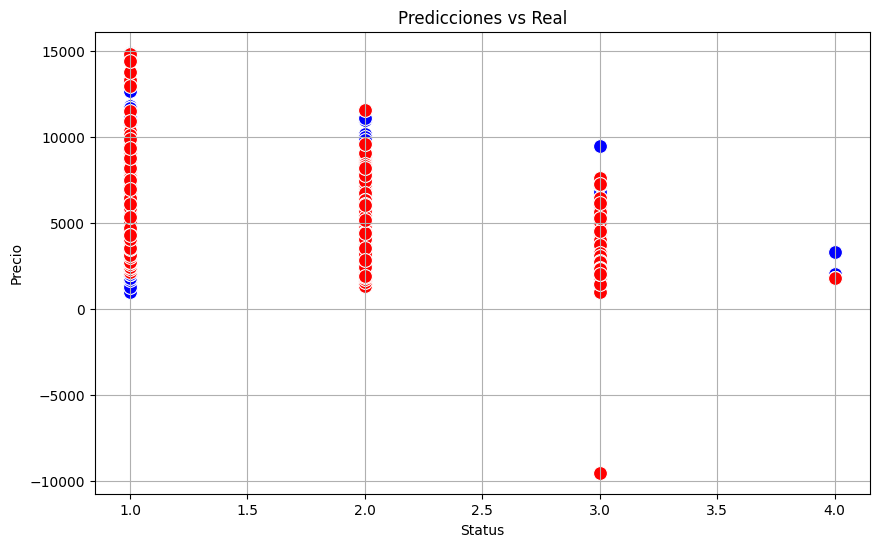

In [22]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido
plt.figure(figsize=(10, 6))
sns.scatterplot(data=credicel2, x='status', y='precio', color='blue', s=100)
sns.scatterplot(data=credicel2, x='status', y='Predicciones', color='red', s=100)
plt.title('Predicciones vs Real')
plt.xlabel('Status')
plt.ylabel('Precio')
plt.grid(True)
plt.show()

# Análisis de Regresión: Costo Total

In [23]:
#Declaramos las variables dependientes e independientes para la regresión linea
x_costo=credicel[['descuento', 'semana','monto_accesorios','status','fraude','inversion','reautorizacion','puntos','score_buro','limite_credito','semana_actual','edad_cliente']]
y_costo=credicel['costo_total']

In [24]:
#Dividimos los datos por training y tests
x_train_costo, x_test_costo, y_train_costo, y_test_costo = train_test_split(x_costo, y_costo, test_size=0.2, random_state=42)

In [25]:
# Creamos el modelo de regresión
model = LinearRegression()

model.fit(x_train_costo, y_train_costo)

LinearRegression()

In [26]:
# Calculamos los coeficientes por cada una de las variables
coeficientes_costo = model.coef_

# Intercepto
intercepto_costo = model.intercept_

# Imprimimos los coeficientes y el intercepto
print("Coeficientes costo total:", coeficientes_costo)
print("Intercepto costo total:", intercepto_costo)

Coeficientes costo total: [ 1.32024905e+00  1.05128205e+01  2.43408660e+00 -1.29111809e+03
 -6.81782025e+01 -9.80030087e+01 -5.46469206e+01  1.27676267e+01
  6.36728749e-01  1.67966197e-01  2.87831772e+01 -3.82928430e+00]
Intercepto costo total: 2889.9109689754378


Variables con mayores coeficientes:


*  Status: -1291.11
*  Semana actual: 28.78


In [27]:
x_costo2 = credicel[['status','semana_actual']]
#Dividimos los datos por training y tests
x_train_costo2, x_test_costo2, y_train_costo, y_test_costo = train_test_split(x_costo2, y_costo, test_size=0.2, random_state=42)

In [28]:
# Hacemos predicciones
y_pred2 = model.predict(x_test_costo)

# Calculate the R-squared score
r2_costo = r2_score(y_test_costo, y_pred2)
print("R-squared (R2) score:", r2_costo)

R-squared (R2) score: 0.32404085494926516


In [29]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['descuento', 'semana', 'monto_accesorios', 'status', 'fraude',
        'inversion', 'reautorizacion', 'puntos', 'score_buro',
        'limite_credito', 'semana_actual', 'edad_cliente'], dtype=object),
 'n_features_in_': 12,
 'coef_': array([ 1.32024905e+00,  1.05128205e+01,  2.43408660e+00, -1.29111809e+03,
        -6.81782025e+01, -9.80030087e+01, -5.46469206e+01,  1.27676267e+01,
         6.36728749e-01,  1.67966197e-01,  2.87831772e+01, -3.82928430e+00]),
 'rank_': 12,
 'singular_': array([2.87962228e+05, 3.79424243e+04, 1.78137513e+04, 1.34434657e+04,
        7.94214588e+03, 1.66028926e+03, 1.27047198e+03, 1.08046016e+03,
        5.92473691e+01, 5.35276554e+01, 3.40487059e+01, 2.17206426e+01]),
 'intercept_': 2889.9109689754378}

## Modelo Matemático:

costo total = 2889.91 + (1291.1181 x status) + (28.7832 x semana_actual)

In [30]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(x_costo,y_costo)

0.31216984503523404

In [31]:
#Predecimos los valores del precio a partir del valor del enganche
y_pred_2= model.predict(X=x_costo)
y_pred_2

array([2659.33329455, 3825.28081769, 2711.59279238, ..., 5383.14543701,
       7318.85382217, 5457.7028398 ])

In [32]:
#Realizamos una copia del dataframe
credicel3=credicel.copy()

In [33]:
#Insertamos la columna de predicciones en el DataFrame
credicel3.insert(0, 'Predicciones', y_pred_2)
credicel3

,Predicciones,folio,tag,folio_solicitud,fecha,marca,modelo,plazo,precio,enganche,...,porc_eng,limite_credito,semana_actual,cp_cliente,edad_cliente,cd_cliente,edo_cliente,cd_venta,edo_venta,curp
0,2659.333295,3,HDNAWQ3A,30,2021-11-12 19:00:00,ZTE,Blade A3 2020 RO B,26S,1949.0,780.0,...,40.02,5000,26,72490,23.0,0,0,Tantoyuca,Veracruz,AEVM980413MVZNDR02
1,3825.280818,4,M418YNR4,33,2021-11-12 19:15:00,MOTOROLA,LTE XT2097-12 E7I POWER Azul,13S,2999.0,1050.0,...,35.01,6000,13,72490,60.0,PUEBLA,PUE.,Heroica Puebla de Zaragoza,Puebla,ZALC610119MPLPRR07
2,2711.592792,5,SZ7V3NZT,37,2021-11-13 14:13:00,ZTE,BLADE A3 2020 Gris,13S,1959.0,490.0,...,25.01,0,74,72490,58.0,TANTOYUCA,VER.,0,0,0
3,3483.969006,6,9I08UIQZ,38,2021-11-13 15:45:00,ZTE,BLADE A3 2020 Gris,13S,1959.0,490.0,...,25.01,7000,13,72490,42.0,AMXTLAN PUE,0,Zacatlan,Puebla,SAMJ790115MPLNRS02
4,6649.427030,7,JMF4LKYU,44,2021-11-13 16:10:00,MOTOROLA,G10 B,39S,4299.0,1075.0,...,25.01,7000,74,72490,33.0,TANTOYUCA,VER.,Tantoyuca,Veracruz,TEHF880707HVZRRR07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22730,5785.490711,22967,92KQVRIX,96502,2023-04-18 18:45:00,Motorola,Moto E13,26S,3349.0,297.0,...,8.87,10000,0,97880,35.9,0,YUC,Oxkutzcab,Yucatan,PACT990804MYNCCH05
22731,4838.263122,22968,NWB2EA8J,96479,2023-04-18 18:46:00,Motorola,Moto E22i,26S,4100.0,1209.0,...,29.49,5000,0,37295,35.9,0,GTO,Leon,Guanajuato,HEGB950620MGTRMN03
22732,5383.145437,22969,VDTRJ2W6,96442,2023-04-18 18:47:00,Samsung,A13,26S,4849.0,1152.0,...,23.76,4750,0,20210,35.9,0,AGS,Aguascalientes,Aguascalientes,GADF870205HASLZL07
22733,7318.853822,22970,PETLF56C,96536,2023-04-18 18:49:00,Samsung,A53 5G,39S,9799.0,2799.0,...,28.56,7000,0,78434,35.9,0,SLP,Soledad De Graciano Sanchez,San Luis Potosi,DELJ700417HSPLRS03


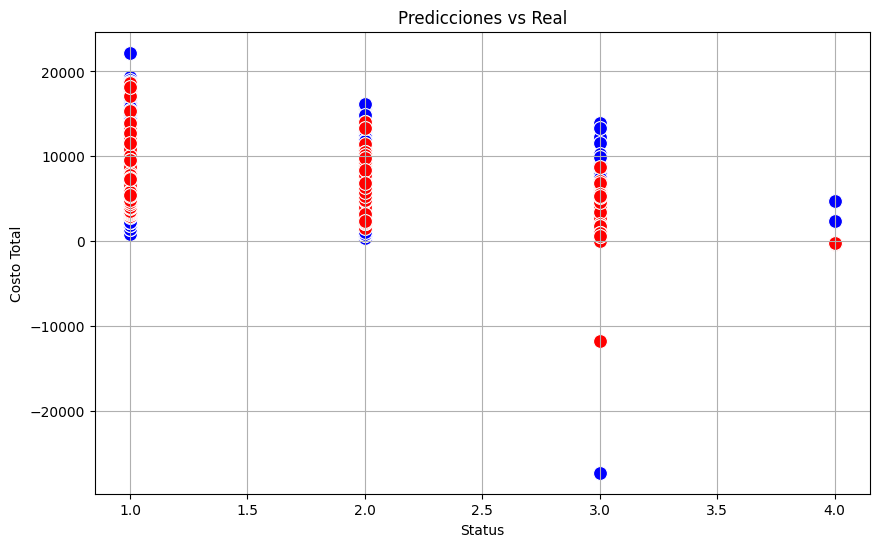

In [34]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido
plt.figure(figsize=(10, 6))
sns.scatterplot(data=credicel3, x='status', y='costo_total', color='blue', s=100)
sns.scatterplot(data=credicel3, x='status', y='Predicciones', color='red', s=100)
plt.title('Predicciones vs Real')
plt.xlabel('Status')
plt.ylabel('Costo Total')
plt.grid(True)
plt.show()

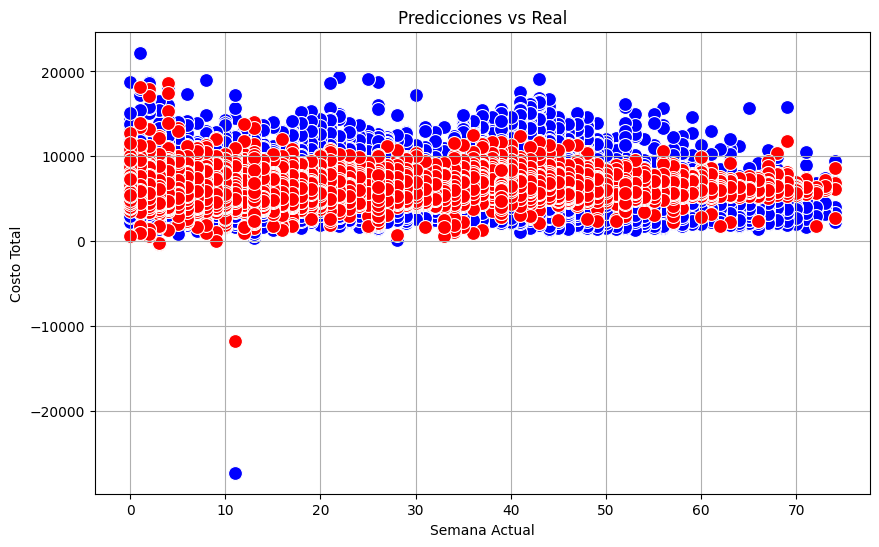

In [35]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido
plt.figure(figsize=(10, 6))
sns.scatterplot(data=credicel3, x='semana_actual', y='costo_total', color='blue', s=100)
sns.scatterplot(data=credicel3, x='semana_actual', y='Predicciones', color='red', s=100)
plt.title('Predicciones vs Real')
plt.xlabel('Semana Actual')
plt.ylabel('Costo Total')
plt.grid(True)
plt.show()

# Análisis de Regresión: Plazo

In [36]:
#Quitamos la S en la columna "Plazo" para convertirla en numérica
credicel['plazo'] = credicel['plazo'].str.replace('S', '')
credicel['plazo'] = pd.to_numeric(credicel['plazo'], errors='coerce')

In [37]:
#Declaramos las variables dependientes e independientes para la regresión linea
x_plazo=credicel[['descuento', 'semana','monto_accesorios','status','fraude','inversion','reautorizacion','puntos','score_buro','limite_credito','semana_actual','edad_cliente']]
y_plazo=credicel['plazo']

In [38]:
#Dividimos los datos por training y tests
x_train_plazo, x_test_plazo, y_train_plazo, y_test_plazo = train_test_split(x_plazo, y_plazo, test_size=0.2, random_state=42)

In [39]:
# Creamos el modelo de regresión
model = LinearRegression()

model.fit(x_train_plazo, y_train_plazo)

LinearRegression()

In [40]:
# Calculamos los coeficientes por cada una de las variables
coeficientes_plazo = model.coef_

# Intercepto
intercepto_plazo = model.intercept_

# Imprimimos los coeficientes y el intercepto
print("Coeficientes Plazo:", coeficientes_plazo)
print("Intercepto Plazo:", intercepto_plazo)

Coeficientes Plazo: [ 6.22883601e-03 -4.06154649e-02  8.89499529e-03 -5.49788241e+00
 -6.25554070e-01  1.41965691e-02 -8.45659907e-01  3.96009057e-02
  2.48012781e-03  6.26151718e-04  1.29988263e-01 -8.38223418e-03]
Intercepto Plazo: 34.53045993217761


Variables con mayores coeficientes:

Satus: -5.4979
Reautorización: 0.8457

In [41]:
# Hacemos predicciones
y_pred3 = model.predict(x_test_plazo)

# Calculate the R-squared score
r2_plazo = r2_score(y_test_plazo, y_pred3)
print("R-squared (R2) score:", r2_plazo)

R-squared (R2) score: 0.3425727016178385


In [42]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['descuento', 'semana', 'monto_accesorios', 'status', 'fraude',
        'inversion', 'reautorizacion', 'puntos', 'score_buro',
        'limite_credito', 'semana_actual', 'edad_cliente'], dtype=object),
 'n_features_in_': 12,
 'coef_': array([ 6.22883601e-03, -4.06154649e-02,  8.89499529e-03, -5.49788241e+00,
        -6.25554070e-01,  1.41965691e-02, -8.45659907e-01,  3.96009057e-02,
         2.48012781e-03,  6.26151718e-04,  1.29988263e-01, -8.38223418e-03]),
 'rank_': 12,
 'singular_': array([2.87962228e+05, 3.79424243e+04, 1.78137513e+04, 1.34434657e+04,
        7.94214588e+03, 1.66028926e+03, 1.27047198e+03, 1.08046016e+03,
        5.92473691e+01, 5.35276554e+01, 3.40487059e+01, 2.17206426e+01]),
 'intercept_': 34.53045993217761}

Modelo Matemático:

plazo = 34.5305 + (-5.4979 x status) + (-0.8457 x autorización)

In [43]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(x_plazo, y_plazo)

0.34806160182325785

In [44]:
#Predecimos los valores del precio a partir del valor del enganche
y_pred_3= model.predict(X=x_plazo)
y_pred_3

array([26.56250451, 19.3400392 , 20.26514558, ..., 22.8823056 ,
       19.72516993, 20.05125942])

In [45]:
#Realizamos una copia del dataframe
credicel4=credicel.copy()

In [46]:
#Insertamos la columna de predicciones en el DataFrame
credicel4.insert(0, 'Predicciones', y_pred_3)
credicel4

,Predicciones,folio,tag,folio_solicitud,fecha,marca,modelo,plazo,precio,enganche,...,porc_eng,limite_credito,semana_actual,cp_cliente,edad_cliente,cd_cliente,edo_cliente,cd_venta,edo_venta,curp
0,26.562505,3,HDNAWQ3A,30,2021-11-12 19:00:00,ZTE,Blade A3 2020 RO B,26,1949.0,780.0,...,40.02,5000,26,72490,23.0,0,0,Tantoyuca,Veracruz,AEVM980413MVZNDR02
1,19.340039,4,M418YNR4,33,2021-11-12 19:15:00,MOTOROLA,LTE XT2097-12 E7I POWER Azul,13,2999.0,1050.0,...,35.01,6000,13,72490,60.0,PUEBLA,PUE.,Heroica Puebla de Zaragoza,Puebla,ZALC610119MPLPRR07
2,20.265146,5,SZ7V3NZT,37,2021-11-13 14:13:00,ZTE,BLADE A3 2020 Gris,13,1959.0,490.0,...,25.01,0,74,72490,58.0,TANTOYUCA,VER.,0,0,0
3,22.350922,6,9I08UIQZ,38,2021-11-13 15:45:00,ZTE,BLADE A3 2020 Gris,13,1959.0,490.0,...,25.01,7000,13,72490,42.0,AMXTLAN PUE,0,Zacatlan,Puebla,SAMJ790115MPLNRS02
4,35.528605,7,JMF4LKYU,44,2021-11-13 16:10:00,MOTOROLA,G10 B,39,4299.0,1075.0,...,25.01,7000,74,72490,33.0,TANTOYUCA,VER.,Tantoyuca,Veracruz,TEHF880707HVZRRR07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22730,27.982498,22967,92KQVRIX,96502,2023-04-18 18:45:00,Motorola,Moto E13,26,3349.0,297.0,...,8.87,10000,0,97880,35.9,0,YUC,Oxkutzcab,Yucatan,PACT990804MYNCCH05
22731,25.340753,22968,NWB2EA8J,96479,2023-04-18 18:46:00,Motorola,Moto E22i,26,4100.0,1209.0,...,29.49,5000,0,37295,35.9,0,GTO,Leon,Guanajuato,HEGB950620MGTRMN03
22732,22.882306,22969,VDTRJ2W6,96442,2023-04-18 18:47:00,Samsung,A13,26,4849.0,1152.0,...,23.76,4750,0,20210,35.9,0,AGS,Aguascalientes,Aguascalientes,GADF870205HASLZL07
22733,19.725170,22970,PETLF56C,96536,2023-04-18 18:49:00,Samsung,A53 5G,39,9799.0,2799.0,...,28.56,7000,0,78434,35.9,0,SLP,Soledad De Graciano Sanchez,San Luis Potosi,DELJ700417HSPLRS03


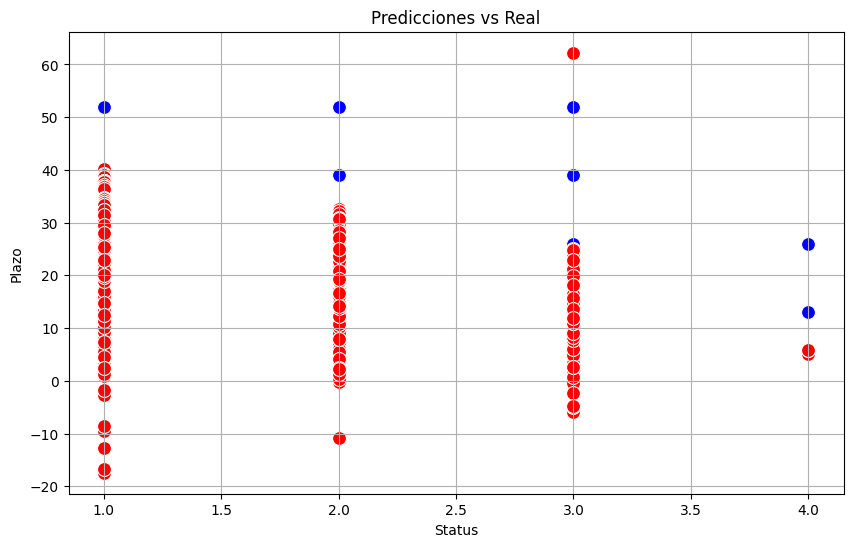

In [47]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido
plt.figure(figsize=(10, 6))
sns.scatterplot(data=credicel4, x='status', y='plazo', color='blue', s=100)
sns.scatterplot(data=credicel4, x='status', y='Predicciones', color='red', s=100)
plt.title('Predicciones vs Real')
plt.xlabel('Status')
plt.ylabel('Plazo')
plt.grid(True)
plt.show()

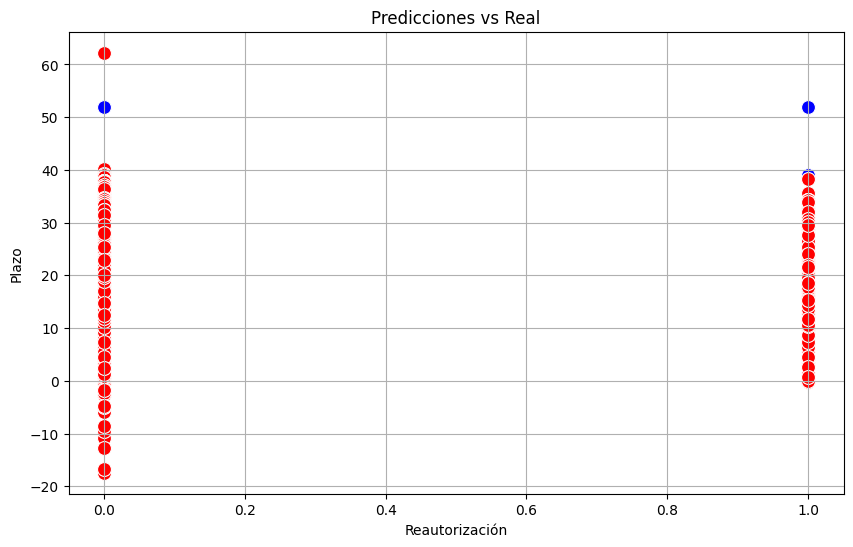

In [48]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido
plt.figure(figsize=(10, 6))
sns.scatterplot(data=credicel4, x='reautorizacion', y='plazo', color='blue', s=100)
sns.scatterplot(data=credicel4, x='reautorizacion', y='Predicciones', color='red', s=100)
plt.title('Predicciones vs Real')
plt.xlabel('Reautorización')
plt.ylabel('Plazo')
plt.grid(True)
plt.show()